In [1]:
import zipfile
import pandas as pd

In [2]:
with zipfile.ZipFile('./datasets/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./datasets')

In [3]:
df = pd.read_csv('./datasets/client_info.csv')

In [4]:
df.head(5)

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


## Task 1 (Accuracy)

In [5]:
df = df.set_index('ID') # Назначит колонку ID индексом таблицы
df.head(5)

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


In [6]:
y = pd.DataFrame(df['TARGET']) # Результирующий признак "Отток клиентов"
x = df[list(df)[:-1]] # Все оставшиеся значения кроме 'TARGET'

print('Размер таблицы y:', y.shape) # shape возвращает кортеж формат формы будет (строки, столбцы)
print('Размер таблицы x:', x.shape)

Размер таблицы y: (355190, 1)
Размер таблицы x: (355190, 103)


In [7]:
x_num = x.select_dtypes(include = ['float', 'int']) #число количественных переменных
x_cat = x.select_dtypes(include = ['object']) #число категориальных переменных

print('Кол-во x_num:', x_num.shape[-1])
print('Кол-во x_cat:', x_cat.shape[-1])

Кол-во x_num: 47
Кол-во x_cat: 56


Предобработаем количественные переменные. Выведено среднее и стандартное отклонение по датасету для каждого признака после стандартизации

In [8]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
x_num_scal = scal.fit_transform(x_num) # стандартизация для признаков x_num
df_x_num_scal = pd.DataFrame(x_num_scal, columns = list(x_num.columns)) #dataframe

print(round(df_x_num_scal.mean(), 2)) #Среднее отклонение
print('')
print(round(df_x_num_scal.std(), 2)) #Стандартное отклонение

CR_PROD_CNT_IL              0.0
AMOUNT_RUB_CLO_PRC          0.0
TURNOVER_DYNAMIC_IL_1M     -0.0
AMOUNT_RUB_SUP_PRC          0.0
REST_DYNAMIC_FDEP_1M        0.0
REST_DYNAMIC_SAVE_3M       -0.0
CR_PROD_CNT_VCU            -0.0
REST_AVG_CUR               -0.0
AMOUNT_RUB_NAS_PRC          0.0
TRANS_COUNT_SUP_PRC        -0.0
TRANS_COUNT_NAS_PRC         0.0
CR_PROD_CNT_TOVR           -0.0
CR_PROD_CNT_PIL            -0.0
TURNOVER_CC                 0.0
TRANS_COUNT_ATM_PRC         0.0
AMOUNT_RUB_ATM_PRC          0.0
TURNOVER_PAYM              -0.0
AGE                         0.0
CR_PROD_CNT_CC              0.0
REST_DYNAMIC_FDEP_3M       -0.0
REST_DYNAMIC_IL_1M          0.0
CR_PROD_CNT_CCFP            0.0
REST_DYNAMIC_CUR_1M        -0.0
REST_AVG_PAYM              -0.0
LDEAL_GRACE_DAYS_PCT_MED   -0.0
REST_DYNAMIC_CUR_3M         0.0
CNT_TRAN_SUP_TENDENCY3M     0.0
TURNOVER_DYNAMIC_CUR_1M    -0.0
REST_DYNAMIC_PAYM_3M        0.0
SUM_TRAN_SUP_TENDENCY3M     0.0
REST_DYNAMIC_IL_3M          0.0
CNT_TRAN

Трансформация категориальных признаков (One-Hot Encoding подход к кодированию)

In [9]:
#OneHotEncoder кодировщик берёт столбец с категориальными данными, 
#который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов
from sklearn.preprocessing import OneHotEncoder

x_cat = x_cat.drop(columns = ['CLNT_JOB_POSITION'])
encoder = OneHotEncoder(handle_unknown = 'ignore')
x_cat_OHE = encoder.fit_transform(x_cat).toarray()
df_x_cat_OHE = pd.DataFrame(x_cat_OHE)
df_x_cat_OHE.columns = encoder.get_feature_names_out()

print(x_cat_OHE.shape[-1]) # Кол-во колонок в таблице x_cat_OHE 

323


Объединие датасетов. Сохранение датасет в папку.


In [10]:
from pathlib import Path
from sklearn.model_selection import train_test_split

x_ready = pd.concat([df_x_num_scal, df_x_cat_OHE], axis = 1) #объединение DF

#data_prepared = Path ('../datasets/data_prepared.csv') #сохраняем файл в папку
#data_prepared.parent.mkdir(parents = True, exist_ok = True)
#x_ready.to_csv(data_prepared)

x_train, x_test, y_train, y_test = train_test_split(x_ready, y, test_size = 0.2, random_state=21)
print(x_train.shape) # Размерность обучающей выборки x_train 

(284152, 370)


Accuracy модели на тестовой выборке.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)
fit_x_y = LR.fit(x_train, y_train.values.ravel())
y_predict = LR.predict(x_test)
print (metrics.accuracy_score(y_test, y_predict)) #Accuracy модели 
#Accuracy - это показатель, который описывает общую точность предсказания модели по всем классам. 
#Это особенно полезно, когда каждый класс одинаково важен.

0.9197612545398237


Процент клиентов в тестовой выборке, у которых индикатор оттока равен 0.
Тебе что-то должно показаться подозрительным)

In [12]:
print(y_test.value_counts()[0]/len(y_test)) # Процент клиентов в тестовой выборке у которых индикатор оттока равен 0

0.9196064078380585


Топ-10 самых важных факторов по мнению модели в абсолютном значении.

[Text(0.5, 1.0, 'Топ-10 самых важных факторов по мнению модели в абсолютном значении')]

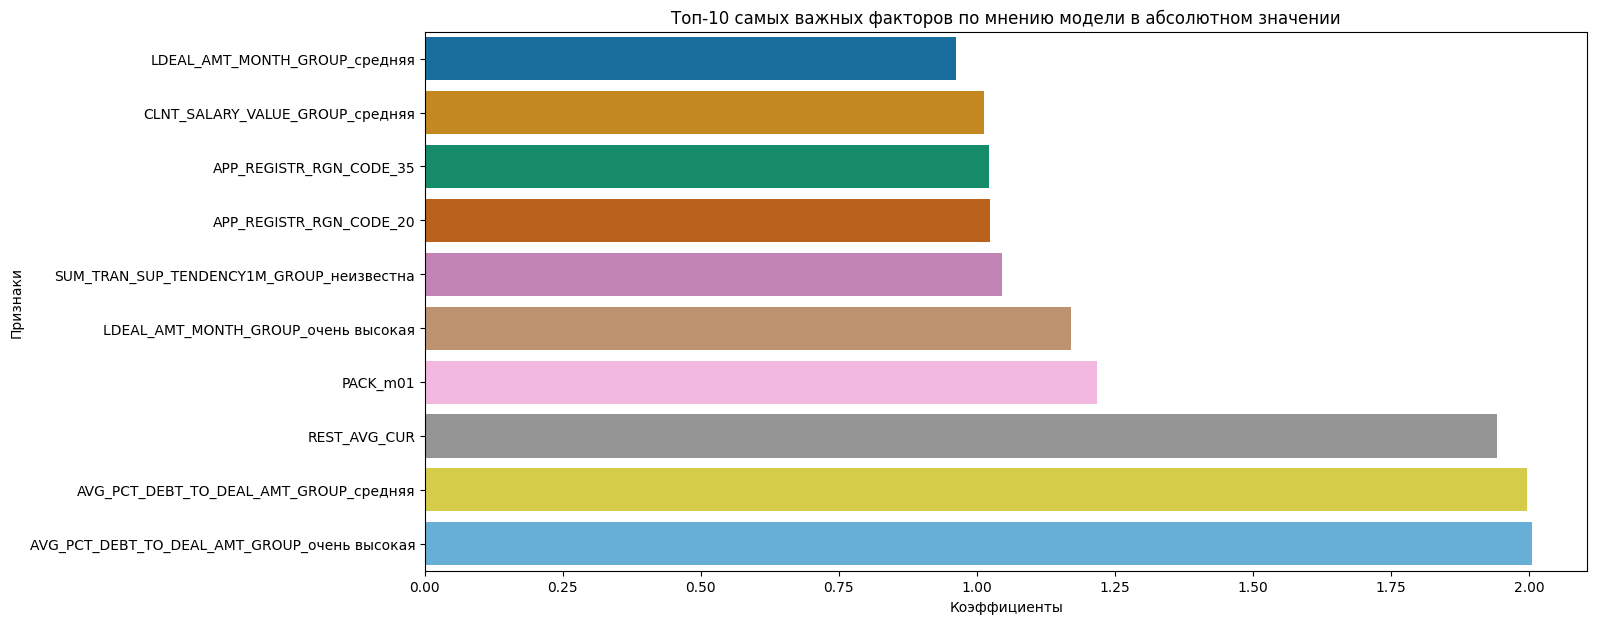

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sing_df=pd.DataFrame(list(x_ready.columns), columns=['Признаки'])
coef_df=pd.DataFrame(np.abs(fit_x_y.coef_).T, columns=['Коэффициенты'])
df_done=pd.concat([sing_df, coef_df], axis=1)
df_sort=df_done.sort_values('Коэффициенты', ascending=True)[-10:]
plt.subplots(figsize=(15, 7))
ax=sns.barplot(x='Коэффициенты', y='Признаки', data = df_sort, palette='colorblind')
ax.set(title='Топ-10 самых важных факторов по мнению модели в абсолютном значении')

## Task 2 (алгоритм градиентного спуска)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [15]:
x = symbols('x') #с помощью symbols определяем несколько символов за раз. Строка содержит названия переменных, разделенные запятыми или пробелами
def y(x):
    return diff(x) #частная производная (diff(func, var))
y(x**2 - x + 21)

2*x - 1

In [16]:
x, y = symbols('x, y')
def p(n, k):
    return diff(n, k)
p((x-y)**2, x) 

2*x - 2*y

In [17]:
x, w, b, i, n, y = symbols('x, w, b, i, n, y')
y_true = y
y_pred = w*x + b
mse = (Sum(((y_pred - y_true)**2), (i,1,n)))/n
mse

Sum((b + w*x - y)**2, (i, 1, n))/n

In [18]:
p(mse, w)

Sum(2*x*(b + w*x - y), (i, 1, n))/n

In [19]:
p(mse, b)

Sum(2*b + 2*w*x - 2*y, (i, 1, n))/n

Реализации алгоритма градиентного спуска

In [20]:
x = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

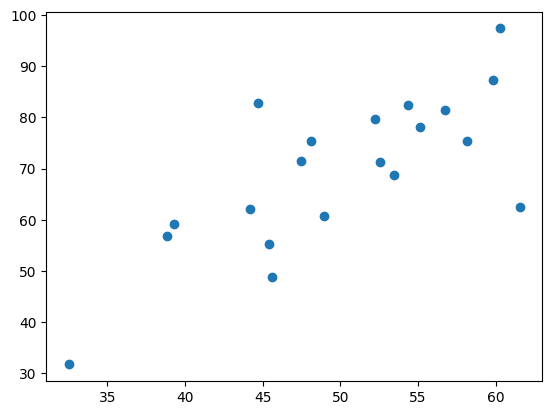

In [21]:
plt.scatter(x, y);

In [22]:
class Gradient():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def predict(self, w, b):
        self.w = w
        self.b = b
        self.y_pred = np.add(np.multiply(w, self.x), b)
        self.mse(self.y_pred)
        return self.y_pred
    
    def mse(self, y_pred):
        mse = np.mean((self.y - y_pred) ** 2)
        return mse
    
    def update(self, w, b, a = 0.0001):
        self.predict(w, b)
        w_new = w - a * -2 * np.multiply(self.x, np.subtract(self.y, self.y_pred)).mean()
        b_new = b - a * 2 * np.subtract(self.y_pred, self.y).mean()
        self.w = w_new
        self.b = b_new
        self.predict(self.w, self.b)
        return w_new, b_new

In [23]:
w = 0.5
b = 4
gradient = Gradient(x, y)
y_pred = gradient.predict(w, b)
MSE = gradient.mse(y_pred)
w_new, b_new = gradient.update(w, b)
print(y_pred)
print(MSE)
print(w_new, b_new)

[20.25117263 30.71340201 34.76517902 27.73781982 33.90660393 31.57109421
 30.10589834 23.64978334 28.05252085 30.27500722 26.70986507 31.17581744
 26.08202475 33.08423536 32.36360403 28.47794428 26.34359811 34.14866342
 26.80932188 23.40840877]
1784.8517253411974
0.9150528224014477 4.00809052559105


Улучшение кода метод optimize

In [24]:
class GradientDescent(Gradient):
    
    def __init__(self, x, y):
        super().__init__(x, y)
        
    def optimize(self, num_iterations, stopping_threshold = 0.001, a = 0.0001):
        w_new, b_new = self.update(w, b, a = 0.0001)
        for i in range(num_iterations):
            y_pred_new = self.predict(w_new, b_new)
            MSE_new = self.mse(y_pred_new)
            if abs(MSE - MSE_new) < stopping_threshold:
                break
            w_new, b_new = self.update(w_new, b_new, a = 0.0001)
        return w_new, b_new, MSE_new

In [25]:
grad = GradientDescent(x, y)
w = 0.5
b = 4
y_pred = grad.predict(w, b)
MSE = grad.mse(y_pred)
w_new, b_new = grad.update(w, b)
print(grad.optimize(10))

(1.3115991091004235, 4.015587792053563, 99.29829918175236)
